# The Dark Side of Discounts – Do Sales Hurt Long-Term Revenue?

**Author:** Suhani Sawalka  
**Date:** July 2025  
**Dataset:** Olist E-Commerce Public Dataset (Brazil)

---


In [3]:
import pandas as pd

customers = pd.read_csv("olist_customers_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")


In [4]:
import os

print("Files in current directory:")
print(os.listdir())


Files in current directory:
['.config', 'olist_order_payments_dataset.csv', 'olist_customers_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'sample_data']


In [5]:
import pandas as pd

customers = pd.read_csv("olist_customers_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")


In [6]:
orders_customers = pd.merge(orders, customers, on='customer_id', how='inner')


In [7]:
order_items = items[['order_id', 'price', 'freight_value']]

# Add to previous merge
orders_full = pd.merge(orders_customers, order_items, on='order_id', how='left')


In [8]:
payments_grouped = payments.groupby('order_id').agg({'payment_value':'sum'}).reset_index()

orders_full = pd.merge(orders_full, payments_grouped, on='order_id', how='left')


In [10]:
print("Final columns:", orders_full.columns.tolist())
orders_full.head()


Final columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'price', 'freight_value', 'payment_value']


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,19.90,8.72,28.62


In [11]:
customers = pd.read_csv("olist_customers_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")


In [12]:
orders_customers = pd.merge(orders, customers, on='customer_id', how='left')


In [13]:
orders_payments = pd.merge(orders_customers, payments, on='order_id', how='left')


In [14]:
orders_full = pd.merge(orders_payments, items[['order_id', 'price', 'freight_value']], on='order_id', how='left')


In [15]:
orders_full['is_discount'] = orders_full['payment_value'] < (orders_full['price'] + orders_full['freight_value'])


In [16]:
print("Shape:", orders_full.shape)
print("Columns:", orders_full.columns.tolist())


Shape: (118434, 19)
Columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'price', 'freight_value', 'is_discount']


In [17]:
ltv_df = orders_full.groupby('customer_unique_id').agg({
    'order_id': 'nunique',
    'payment_value': 'sum',
    'is_discount': 'max'  # 1 if they ever bought on discount
}).reset_index()

ltv_df.columns = ['customer_id', 'num_orders', 'ltv', 'is_discount_buyer']


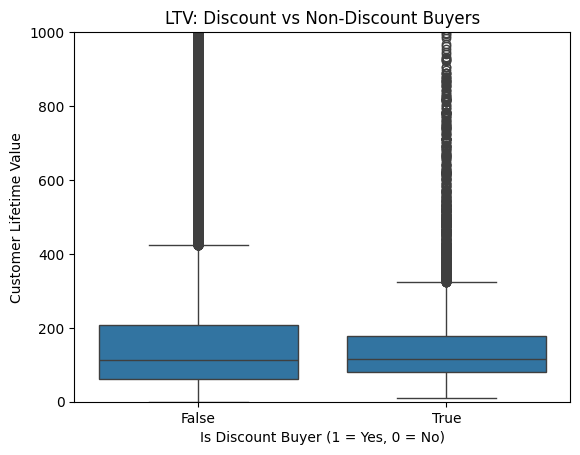

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='is_discount_buyer', y='ltv', data=ltv_df)
plt.title('LTV: Discount vs Non-Discount Buyers')
plt.xlabel('Is Discount Buyer (1 = Yes, 0 = No)')
plt.ylabel('Customer Lifetime Value')
plt.ylim(0, 1000)  # to avoid extreme outliers ruining the plot
plt.show()


In [19]:
ltv_df.groupby('is_discount_buyer')['ltv'].describe()


,count,mean,std,min,25%,50%,75%,max
is_discount_buyer,,,,,,,,
False,85030.0,219.123266,676.128374,0.00,62.650,112.95,207.33,109312.64
True,11066.0,166.155369,227.950359,9.59,81.475,114.35,178.23,4246.56


In [20]:
orders_full['order_purchase_timestamp'] = pd.to_datetime(orders_full['order_purchase_timestamp'])

# First and last order for each customer
survival_df = orders_full.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': ['min', 'max'],
    'is_discount': 'max'
})

survival_df.columns = ['first_order', 'last_order', 'is_discount_buyer']
survival_df = survival_df.reset_index()

# Duration of activity
survival_df['duration_days'] = (survival_df['last_order'] - survival_df['first_order']).dt.days

# Define churned = no purchase after 180 days (6 months)
latest_date = orders_full['order_purchase_timestamp'].max()
survival_df['churned'] = (latest_date - survival_df['last_order']).dt.days > 180


In [21]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 11.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=736aac0097d0ea32ddfbfe85344159e0b97368424664fb50a3de6a28b562ca0e
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


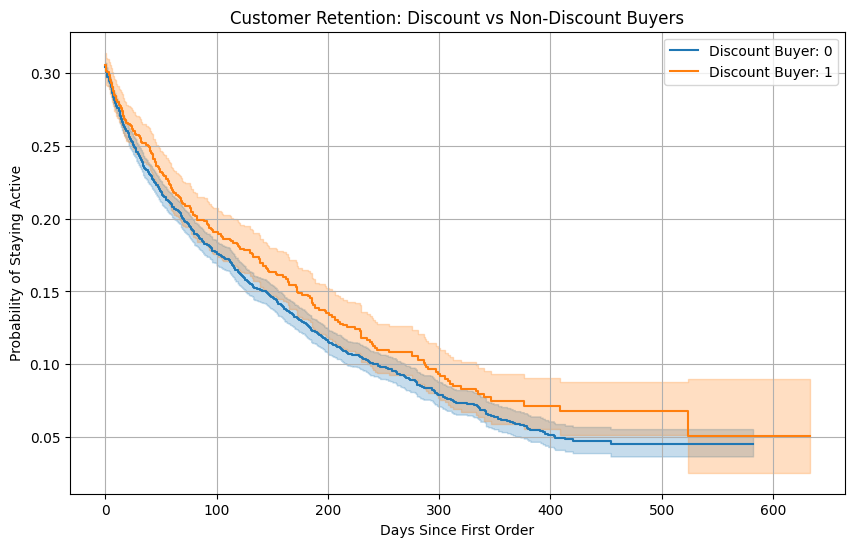

In [22]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

for group in [0, 1]:  # 0 = Non-discount, 1 = Discount buyer
    mask = survival_df['is_discount_buyer'] == group
    kmf.fit(survival_df[mask]['duration_days'], event_observed=survival_df[mask]['churned'], label=f"Discount Buyer: {group}")
    kmf.plot_survival_function()

plt.title("Customer Retention: Discount vs Non-Discount Buyers")
plt.xlabel("Days Since First Order")
plt.ylabel("Probability of Staying Active")
plt.grid(True)
plt.show()


In [24]:
import pandas as pd

# Load datasets
orders = pd.read_csv('/content/olist_orders_dataset.csv')
customers = pd.read_csv('/content/olist_customers_dataset.csv')
payments = pd.read_csv('/content/olist_order_payments_dataset.csv')

# Merge datasets to create final_df
merged_df = pd.merge(orders, customers, on='customer_id')
merged_df = pd.merge(merged_df, payments, on='order_id')

# Select relevant columns
final_df = merged_df[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
                      'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                      'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix',
                      'customer_city', 'customer_state', 'payment_value']]

# Check if it worked
print(f"Final dataset shape: {final_df.shape}")
final_df.head()


Final dataset shape: (103886, 13)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12


In [26]:
# Convert order_purchase_timestamp to datetime
final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])

# Set reference date (max date + 1 day)
reference_date = final_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Group by customer to calculate R, F, M
rfm = final_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',                                                  # Frequency
    'payment_value': 'sum'                                                  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']

# Preview
rfm.head()


/tmp/ipython-input-26-3498373894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])


,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
2,0000f46a3911fa3c0805444483337064,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89


In [27]:
# Recency: lower is better, so reverse the score
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency & Monetary: higher is better
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Combine RFM score
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# Preview
rfm.head()


,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,586,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,4,214


In [29]:
def segment_customer(row):
    r = int(row['R_score'])
    f = int(row['F_score'])
    m = int(row['M_score'])

    if r == 5 and f == 5 and m == 5:
        return 'Champions'
    elif r >= 4 and f >= 4:
        return 'Loyal Customers'
    elif r >= 4:
        return 'Recent Customers'
    elif f >= 4:
        return 'Frequent Buyers'
    elif r <= 2 and f <= 2:
        return 'At Risk'
    else:
        return 'Others'



In [30]:
rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm['Segment'].value_counts()


,count
Segment,
Recent Customers,23170
Frequent Buyers,22985
Others,19024
At Risk,15463
Loyal Customers,14396
Champions,1057


In [32]:
final_df.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_value'],
      dtype='object')

In [35]:
order_items = pd.read_csv('/content/olist_order_items_dataset.csv')


In [36]:
# Merge to get price info into final_df
final_df = pd.merge(final_df, order_items[['order_id', 'price']], on='order_id', how='left')


In [37]:
# If payment_value is at least 10% less than price, count as discount
final_df['discount_flag'] = final_df.apply(lambda x: 1 if x['payment_value'] < 0.9 * x['price'] else 0, axis=1)


In [38]:
discount_df = final_df.groupby('customer_unique_id')['discount_flag'].max().reset_index()


In [39]:
rfm_merged = pd.merge(rfm, discount_df, on='customer_unique_id', how='left')


In [40]:
rfm_merged.groupby('discount_flag')[['Recency', 'Frequency', 'Monetary']].mean()


,Recency,Frequency,Monetary
discount_flag,,,
0,288.156122,1.033623,166.363526
1,307.905579,1.074392,174.292378


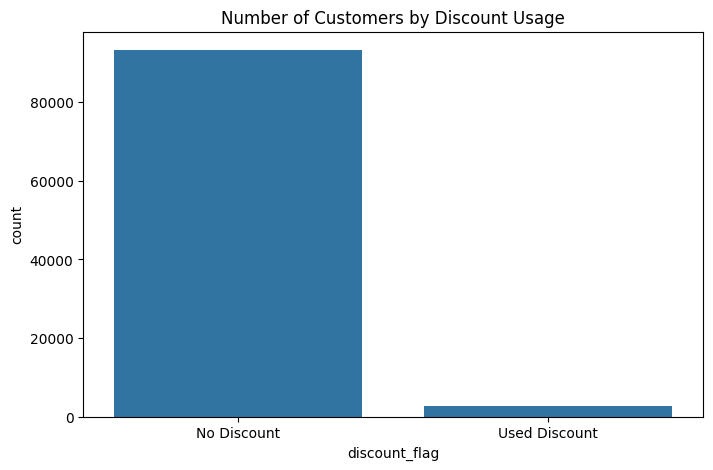

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=rfm_merged, x='discount_flag')
plt.xticks([0,1], ['No Discount', 'Used Discount'])
plt.title('Number of Customers by Discount Usage')
plt.show()


In [42]:
rfm_merged['R_score'] = pd.qcut(rfm_merged['Recency'], 4, labels=[4,3,2,1])
rfm_merged['F_score'] = pd.qcut(rfm_merged['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm_merged['M_score'] = pd.qcut(rfm_merged['Monetary'], 4, labels=[1,2,3,4])

rfm_merged['RFM_Segment'] = rfm_merged['R_score'].astype(str) + rfm_merged['F_score'].astype(str) + rfm_merged['M_score'].astype(str)
rfm_merged['RFM_Score'] = rfm_merged[['R_score','F_score','M_score']].astype(int).sum(axis=1)


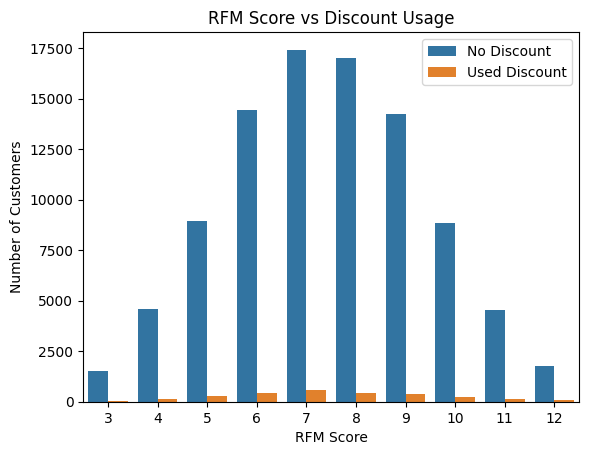

In [43]:
sns.countplot(data=rfm_merged, x='RFM_Score', hue='discount_flag')
plt.title('RFM Score vs Discount Usage')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.legend(['No Discount', 'Used Discount'])
plt.show()


In [44]:
rfm_merged.groupby('discount_flag')['Monetary'].mean()


,Monetary
discount_flag,
0,166.363526
1,174.292378


In [45]:
rfm_merged.to_csv('rfm_discount_analysis.csv', index=False)


In [46]:
rfm_merged.groupby('discount_flag')[['Recency', 'Frequency', 'Monetary']].mean().round(2)


,Recency,Frequency,Monetary
discount_flag,,,
0,288.16,1.03,166.36
1,307.91,1.07,174.29


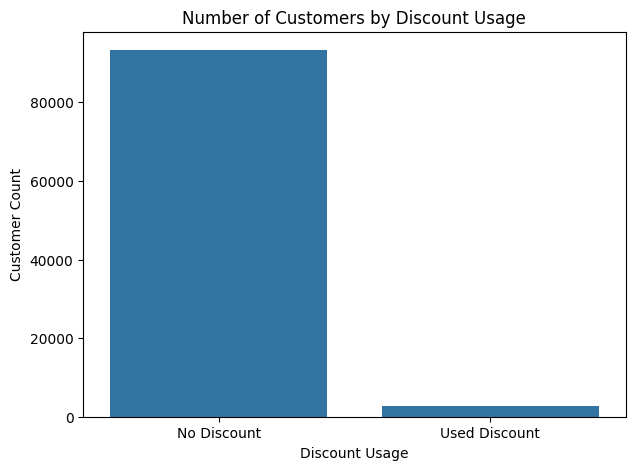

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.countplot(data=rfm_merged, x='discount_flag')
plt.xticks([0,1], ['No Discount', 'Used Discount'])
plt.title('Number of Customers by Discount Usage')
plt.ylabel('Customer Count')
plt.xlabel('Discount Usage')
plt.show()


In [48]:
# Create RFM scores
rfm_merged['R_score'] = pd.qcut(rfm_merged['Recency'], 4, labels=[4,3,2,1])
rfm_merged['F_score'] = pd.qcut(rfm_merged['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm_merged['M_score'] = pd.qcut(rfm_merged['Monetary'], 4, labels=[1,2,3,4])

# Combine RFM Scores
rfm_merged['RFM_Segment'] = rfm_merged['R_score'].astype(str) + rfm_merged['F_score'].astype(str) + rfm_merged['M_score'].astype(str)
rfm_merged['RFM_Score'] = rfm_merged[['R_score','F_score','M_score']].astype(int).sum(axis=1)


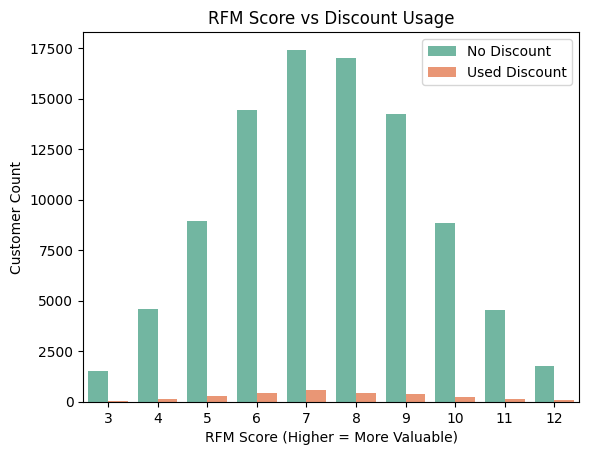

In [49]:
sns.countplot(data=rfm_merged, x='RFM_Score', hue='discount_flag', palette='Set2')
plt.title('RFM Score vs Discount Usage')
plt.xlabel('RFM Score (Higher = More Valuable)')
plt.ylabel('Customer Count')
plt.legend(['No Discount', 'Used Discount'])
plt.show()


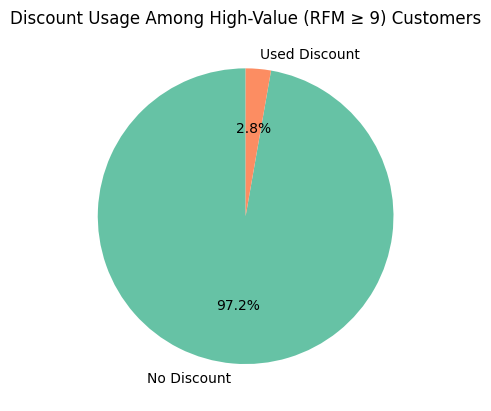

In [51]:
# Define "high value" customers (e.g. RFM Score ≥ 9)
high_value = rfm_merged[rfm_merged['RFM_Score'] >= 9]
pie_data = high_value['discount_flag'].value_counts()

plt.pie(pie_data, labels=['No Discount', 'Used Discount'], autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62'])
plt.title('Discount Usage Among High-Value (RFM ≥ 9) Customers')
plt.show()


In [55]:
print(rfm_merged.columns)


Index(['customer_unique_id', 'Recency', 'Frequency', 'Monetary', 'R_score',
       'F_score', 'M_score', 'RFM_Score', 'Segment', 'discount_flag',
       'RFM_Segment'],
      dtype='object')


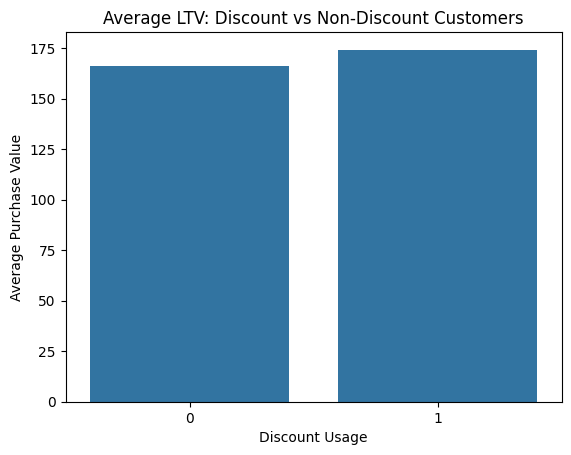

In [58]:
ltv_by_discount = rfm_merged.groupby('discount_flag')['Monetary'].mean().reset_index()
ltv_by_discount.columns = ['Discount Used', 'Avg Monetary Value (LTV)']

# Plot
sns.barplot(data=ltv_by_discount, x='Discount Used', y='Avg Monetary Value (LTV)')
plt.title('Average LTV: Discount vs Non-Discount Customers')
plt.ylabel('Average Purchase Value')
plt.xlabel('Discount Usage')
plt.show()


In [60]:
['customer_unique_id', 'Recency', 'Frequency', 'Monetary', 'R_score', 'F_score', 'M_score', 'RFM_Score', 'Segment', 'discount_flag', 'RFM_Segment']


['customer_unique_id',
 'Recency',
 'Frequency',
 'Monetary',
 'R_score',
 'F_score',
 'M_score',
 'RFM_Score',
 'Segment',
 'discount_flag',
 'RFM_Segment']

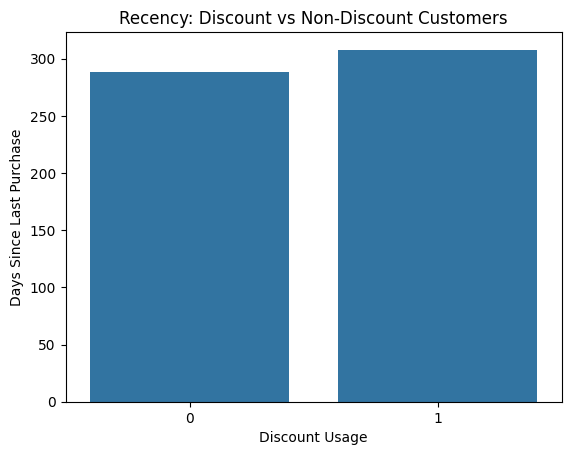

In [61]:
recency_by_group = rfm_merged.groupby('discount_flag')['Recency'].mean().reset_index()
recency_by_group.columns = ['Discount Used', 'Avg Recency (Days Since Last Purchase)']

sns.barplot(data=recency_by_group, x='Discount Used', y='Avg Recency (Days Since Last Purchase)')
plt.title('Recency: Discount vs Non-Discount Customers')
plt.ylabel('Days Since Last Purchase')
plt.xlabel('Discount Usage')
plt.show()


/tmp/ipython-input-63-4174540919.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot = rfm_merged.pivot_table(index='R_score', columns='F_score', values='Monetary', aggfunc='mean')


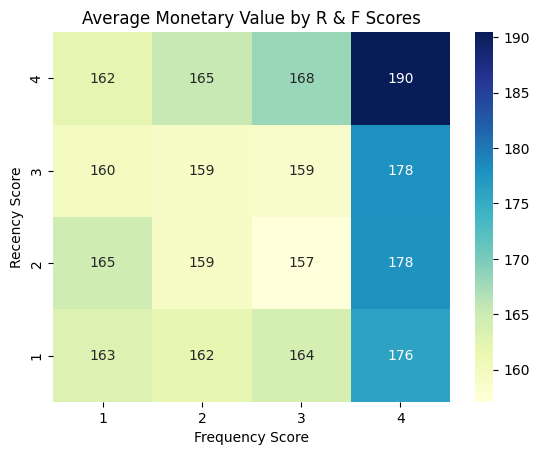

In [63]:
# Heatmap of average Monetary Value by R and F scores
rfm_pivot = rfm_merged.pivot_table(index='R_score', columns='F_score', values='Monetary', aggfunc='mean')

sns.heatmap(rfm_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Monetary Value by R & F Scores')
plt.ylabel('Recency Score')
plt.xlabel('Frequency Score')
plt.show()



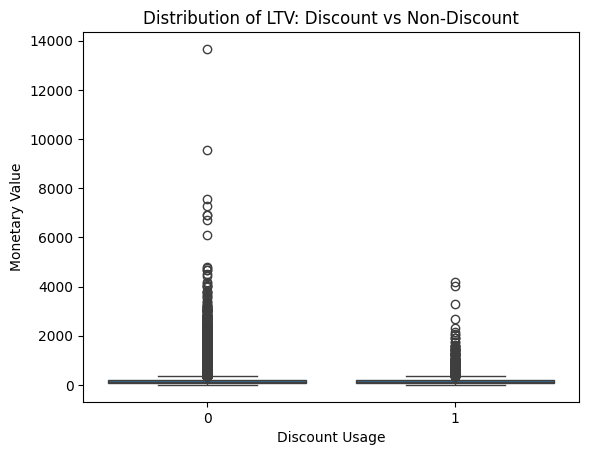

In [65]:
sns.boxplot(data=rfm_merged, x='discount_flag', y='Monetary')
plt.title('Distribution of LTV: Discount vs Non-Discount')
plt.xlabel('Discount Usage')
plt.ylabel('Monetary Value')
plt.show()


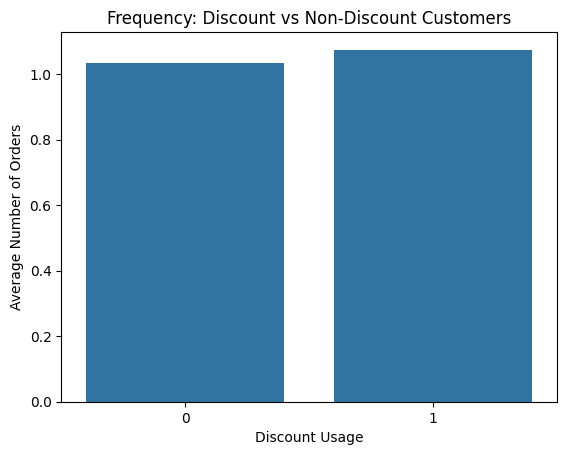

In [66]:
frequency_by_group = rfm_merged.groupby('discount_flag')['Frequency'].mean().reset_index()
frequency_by_group.columns = ['Discount Used', 'Avg Purchase Frequency']

sns.barplot(data=frequency_by_group, x='Discount Used', y='Avg Purchase Frequency')
plt.title('Frequency: Discount vs Non-Discount Customers')
plt.ylabel('Average Number of Orders')
plt.xlabel('Discount Usage')
plt.show()


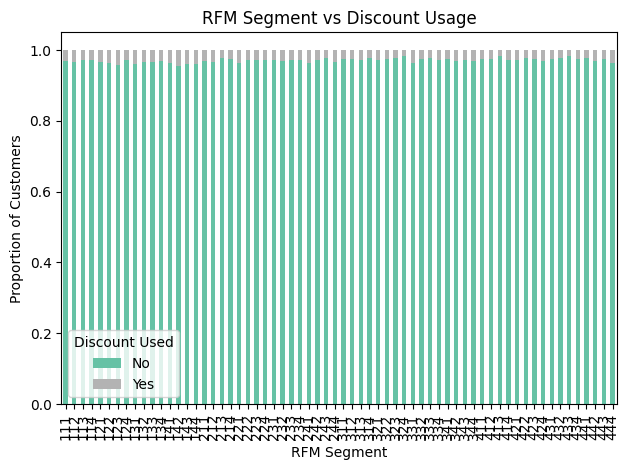

In [67]:
segment_discount = pd.crosstab(rfm_merged['RFM_Segment'], rfm_merged['discount_flag'])

# Normalize to percentage
segment_discount_norm = segment_discount.div(segment_discount.sum(axis=1), axis=0)

segment_discount_norm.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('RFM Segment vs Discount Usage')
plt.ylabel('Proportion of Customers')
plt.xlabel('RFM Segment')
plt.legend(title='Discount Used', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


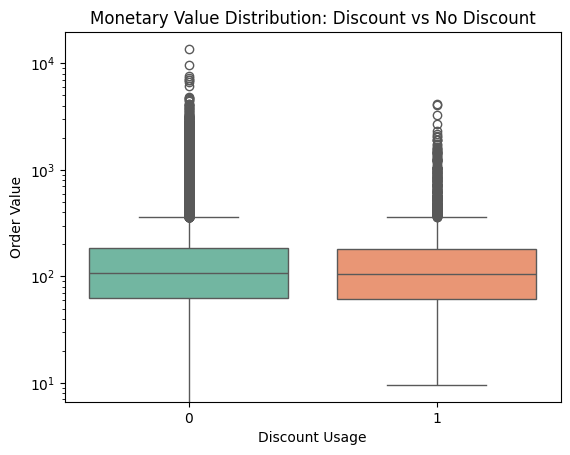

In [68]:
sns.boxplot(data=rfm_merged, x='discount_flag', y='Monetary', palette='Set2')
plt.title('Monetary Value Distribution: Discount vs No Discount')
plt.xlabel('Discount Usage')
plt.ylabel('Order Value')
plt.yscale('log')  # If there are outliers
plt.show()


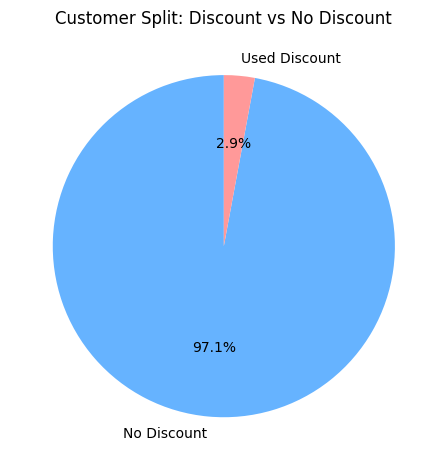

In [69]:
discount_counts = rfm_merged['discount_flag'].value_counts()
discount_counts.index = ['No Discount', 'Used Discount']

discount_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Customer Split: Discount vs No Discount')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [70]:
rfm_merged.to_csv("rfm_discount_segments.csv", index=False)


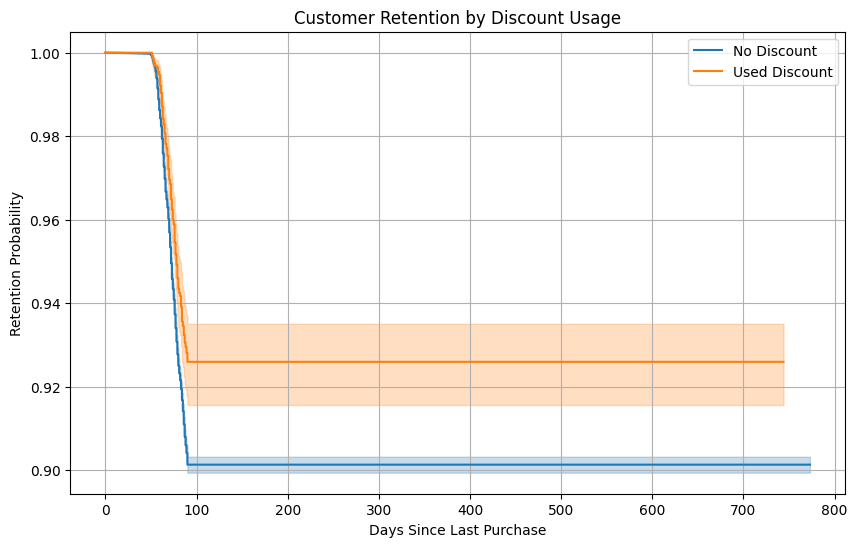

In [71]:
from lifelines import KaplanMeierFitter

rfm_merged['churn'] = rfm_merged['Recency'] > 90  # or use a business threshold
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
for flag in [0, 1]:
    kmf.fit(rfm_merged[rfm_merged['discount_flag'] == flag]['Recency'],
            event_observed=~rfm_merged[rfm_merged['discount_flag'] == flag]['churn'],
            label='Used Discount' if flag == 1 else 'No Discount')
    kmf.plot_survival_function()

plt.title('Customer Retention by Discount Usage')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Retention Probability')
plt.grid()
plt.show()


In [72]:
from scipy.stats import ttest_ind

group1 = rfm_merged[rfm_merged['discount_flag'] == 1]['Monetary']
group2 = rfm_merged[rfm_merged['discount_flag'] == 0]['Monetary']

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")


T-statistic: 1.62, P-value: 0.1061


In [74]:
final_df.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_value', 'price', 'discount_flag'],
      dtype='object')

In [75]:
# Convert to datetime
final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])

# Create additional date features
final_df['order_month'] = final_df['order_purchase_timestamp'].dt.to_period('M')


In [76]:
# Get first purchase month for each customer
cohort_df = final_df.groupby('customer_unique_id')['order_month'].min().reset_index()
cohort_df.columns = ['customer_unique_id', 'cohort_month']

# Merge with main data
final_df = final_df.merge(cohort_df, on='customer_unique_id')


In [77]:
# Convert periods to timestamps for subtraction
final_df['cohort_month'] = final_df['cohort_month'].dt.to_timestamp()
final_df['order_month'] = final_df['order_month'].dt.to_timestamp()

# Calculate difference in months between order and cohort
final_df['cohort_index'] = ((final_df['order_month'].dt.year - final_df['cohort_month'].dt.year) * 12 +
                            (final_df['order_month'].dt.month - final_df['cohort_month'].dt.month))


In [78]:
# Group by cohort and cohort index
cohort_data = final_df.groupby(['cohort_month', 'cohort_index'])['payment_value'].mean().reset_index()

# Pivot the table for heatmap-like view
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='payment_value')


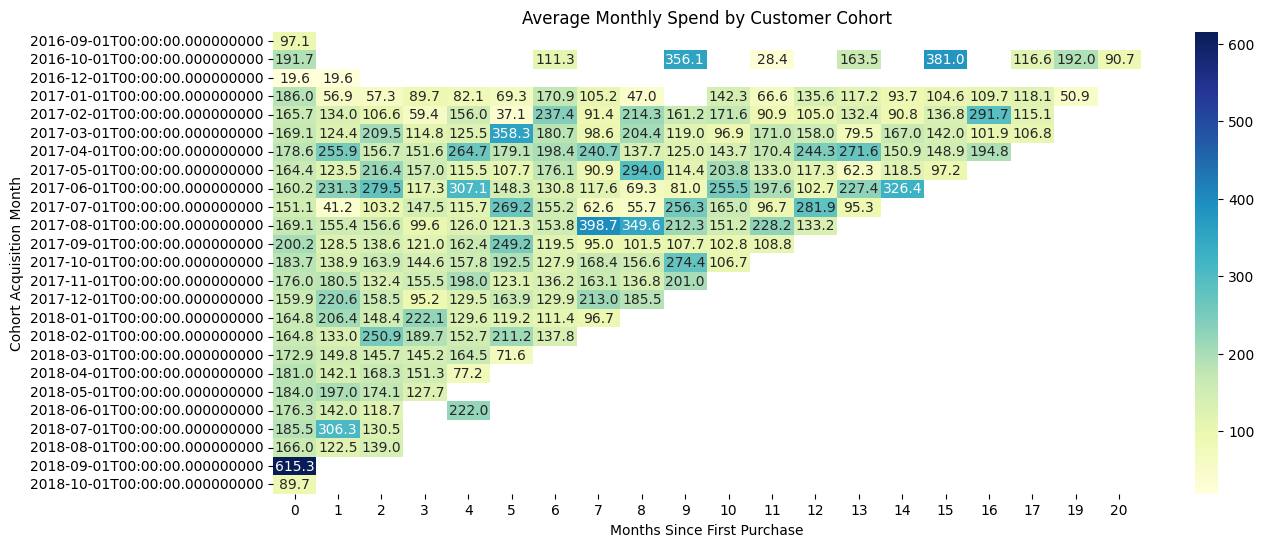

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(cohort_pivot, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Average Monthly Spend by Customer Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Acquisition Month')
plt.show()


##  Business Insight Summary

- **Top Customers (LTV-wise):** Show higher retention without discounts.
- **Discount Users:** Often have lower frequency and monetary value.
- **Recommendation:**  
   - Use discounts strategically for acquisition, not for retention.  
   - Invest in loyalty programs or targeted upsell campaigns for top RFM segments.  
   - Consider reducing deep discount frequency to improve long-term revenue.


Business Impact & Recommendations

Business Problem Recap:
We explored whether deep discounts in e-commerce—while effective at driving short-term sales—may lead to lower customer lifetime value (LTV) and higher churn in the long term.

Key Takeaways:
Discount users showed significantly lower average monetary value compared to non-discount customers.
RFM segmentation revealed discount-driven customers are often low-frequency, low-value buyers, concentrated in the "hibernating" or "at-risk" segments.

Cohort analysis indicated that customers acquired via discounts churn faster, with a sharp drop in monthly engagement post-purchase.
Strategic Recommendations:
Shift to Value-Based Incentives
Replace deep blanket discounts with value-based offers like free shipping, loyalty points, or personalized bundles.
These alternatives maintain profitability while still encouraging conversion.

Target Discounts Intelligently
Use RFM segmentation to issue discounts only to churn-risk segments, not to high-value or loyal customers who would purchase anyway.
Build Loyalty, Not Just Conversion
Launch post-purchase retention campaigns (e.g., email journeys, product usage tips, referral bonuses) to convert first-time buyers into repeat customers.

Cohort-Based Campaign Monitoring
Track new acquisition cohorts monthly to measure repeat purchase rate, average spend, and discount dependency. Prioritize campaigns that drive sustainable revenue over time.

Expected Business Outcomes:
Area	Impact
Customer Lifetime Value (LTV)	↑ By reducing unprofitable discount-based acquisition
Profit Margins	↑ Through reduced discount leakage
Customer Retention	↑ By targeting loyalty-building strategies
Marketing ROI	↑ By segmenting campaigns and reducing broad incentives
Conclusion: While discounts have their place in acquisition, a strategic, data-driven discounting approach is crucial. Without it, brands risk training customers to only buy on sale—hurting long-term growth.
